# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [34]:
# your code here
results = pd.DataFrame(random.choices(range(1,7),k = 10),columns=['DiceScore'])
results

,DiceScore
0,2
1,3
2,3
3,5
4,6
5,5
6,3
7,2
8,1
9,4


#### 2.- Plot the results sorted by value.

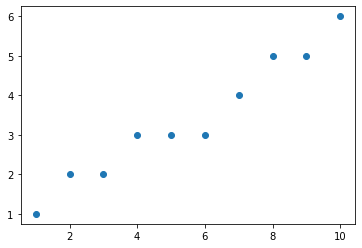

In [35]:
# your code here
results_sorted = sorted(results['DiceScore'])
results_sorted
x=range(1,11)
plt.scatter(x, results_sorted)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

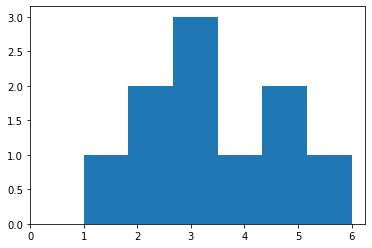

In [37]:
# your code here
plt.hist(results['DiceScore'],bins=6)
plt.xticks(range(0,7))
plt.show()

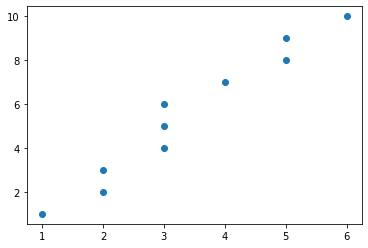

In [38]:
"""
your comments here
If we inverse the first plot its very obvious the relationship between them.
The first tell us the result in each roll, and the second the frequency of each result
"""
plt.scatter(results_sorted,x)

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [41]:
# your code here
mean = (sum(results_sorted))/len(results_sorted)
mean

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [52]:
# your code here
freq = results['DiceScore'].value_counts().to_frame().reset_index()
freq.columns = ['values','frequency']
print(freq)


   values  frequency
0       3          3
1       5          2
2       2          2
3       6          1
4       4          1
5       1          1


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [48]:
# your code here

x = len(results_sorted) 

  
if n % 2 == 0: 
    median_1 = results_sorted[x//2] 
    median_2 = results_sorted[x//2 - 1] 
    median = (median_1 + median_2)/2
else: 
    median = results_sorted[x//2] 


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [45]:
# your code here
q1 = np.quantile(results_sorted, 0.25)

q2 = np.quantile(results_sorted, 0.50)

q3 = np.quantile(results_sorted, 0.75)

iqr = q3 - q1
q1,q2,q3,iqr

(2.25, 3.0, 4.75, 2.5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [49]:
# your code here
dice_rolls = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_rolls

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [11]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [54]:
# your code here
dice_rolls['value'].mean()

3.74

#### 3.- Now, calculate the frequency distribution.


In [56]:
# your code here

dice_rolls["value"].value_counts(normalize=True)

6    0.23
4    0.22
2    0.17
3    0.14
5    0.12
1    0.12
Name: value, dtype: float64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

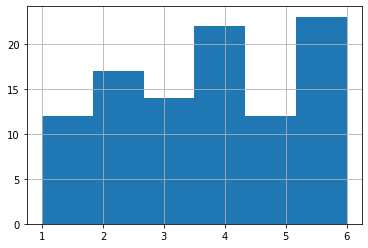

In [58]:
# your code here
dice_rolls['value'].hist(bins=6)

In [15]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [16]:
# your code here

In [17]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [68]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

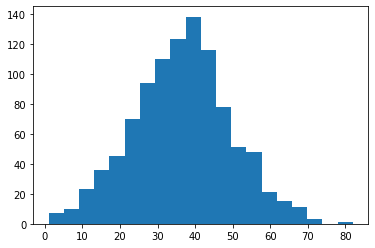

In [69]:
# your code here
plt.hist(ages['observation'], bins = 20)
plt.show()

#The mean will be between 30 and 40

In [70]:
ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

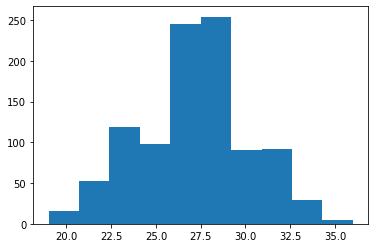

In [71]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
plt.hist(ages2['observation'])
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [22]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [73]:
# your code here
ages2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [24]:
"""
your comments here
we got
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

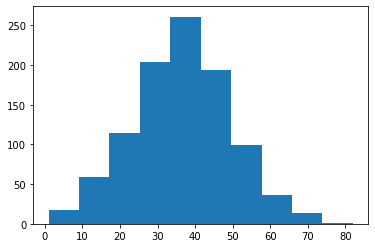

In [74]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
plt.hist(ages['observation'])
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [78]:
# your code here
display(ages3.mean())
display(ages.std())

observation    41.989
dtype: float64

observation    12.8165
dtype: float64

In [27]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [85]:
# your code here
ages3.describe()


,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [29]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [30]:
# your code here

In [31]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [32]:
# your code here

In [33]:
"""
your comments here
"""

'\nyour comments here\n'